In [1]:
import readers
import functions
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from importlib import reload
#if is_changed(functions)

In [100]:
reload(functions)
#reload(readers)

<module 'functions' from 'C:\\Users\\optis\\OneDrive\\Documentos\\GRP\\final_stage\\results\\summary\\functions.py'>

#### Execute the cell below to reload changes done in module functions without restarting the kernel

# Parameter lists for every person (modify if necessary)

In [2]:
#Parameter lists
distance = ['2student','4student','2teacher','4teacher']                      #Adrián
renewalshour = [2,3,4,8]                                               #Vighnesh
roomtemp = [19,23,27]                                                  #Ronghao
exposuretime = ['60s','120s','240s','480s']                            #Yibing
masktype = ['wall','cotton','N95']                                     #Malo
maskNumber = ['one','all']                                             #Malo
ncoughpeople = ['back','back+teach','front+teach','sides+teach','all'] #Sócrates
caseAdri = 'distance'
caseVig = 'ventilation'
caseRong = 'temp'
caseYib = 'student'
caseMal = 'maskType'
caseMal2 = 'maskNumber'
caseSoc = 'npeople'
#For mixed build:
paramlist = [ncoughpeople,renewalshour,roomtemp,exposuretime,masktype,maskNumber,distance]
caseslist = [caseSoc,caseVig,caseRong,caseYib,caseMal,caseMal2,caseAdri]
overalldict = dict(zip(caseslist,paramlist))

### Build mixed dictionaries based on list mixedlist

In [3]:
mixedlist = ['wall','4student','sides+teach',8,23]
timesmixdict = dict.fromkeys(mixedlist)
massmixdict = dict.fromkeys(mixedlist)
totalsmixdict = dict.fromkeys(mixedlist)
zonesmixdict = dict.fromkeys(mixedlist)
back = False
for elem in mixedlist:
    if elem == 'back' and back == False:
        back = True
    elif elem == 'back' and back == True:
        continue
    for casename,plist in overalldict.items():
        print(casename,plist,elem)
        if elem in plist:
            zn,td,md,totd = functions.build(casename,[elem])
            functions.matchallnames(td,md,zn,[elem])
            timesmixdict[elem] = td[elem]
            massmixdict[elem] = md[elem]
            totalsmixdict[elem] = totd[elem]
            zonesmixdict[elem] = zn[elem]
            break
        else:
            print(elem,' not found in mixeddict')

npeople ['back', 'back+teach', 'front+teach', 'sides+teach', 'all'] wall
wall  not found in mixeddict
ventilation [2, 3, 4, 8] wall
wall  not found in mixeddict
temp [19, 23, 27] wall
wall  not found in mixeddict
student ['60s', '120s', '240s', '480s'] wall
wall  not found in mixeddict
maskType ['wall', 'cotton', 'N95'] wall
start building...
building  wall
Read zones: maskType_wall.zones
Reading maskType_wall summaries
timesdict name substitution wall
massdict name substitution wall
npeople ['back', 'back+teach', 'front+teach', 'sides+teach', 'all'] 4student
4student  not found in mixeddict
ventilation [2, 3, 4, 8] 4student
4student  not found in mixeddict
temp [19, 23, 27] 4student
4student  not found in mixeddict
student ['60s', '120s', '240s', '480s'] 4student
4student  not found in mixeddict
maskType ['wall', 'cotton', 'N95'] 4student
4student  not found in mixeddict
maskNumber ['one', 'all'] 4student
4student  not found in mixeddict
distance ['2student', '4student', '2teacher', '

### Load data with your casename and your parameter

In [4]:
zones,timesdict,massdict,totalsdict = functions.build(caseSoc,ncoughpeople)
functions.matchallnames(timesdict,massdict,zones,ncoughpeople)

start building...
building  back
Read zones: npeople_back.zones
Reading npeople_back summaries
building  back+teach
Read zones: npeople_back+teach.zones
Reading npeople_back+teach summaries
building  front+teach
Read zones: npeople_front+teach.zones
Reading npeople_front+teach summaries
building  sides+teach
Read zones: npeople_sides+teach.zones
Reading npeople_sides+teach summaries
building  all
Read zones: npeople_all.zones
Reading npeople_all summaries
timesdict name substitution back
massdict name substitution back
timesdict name substitution back+teach
massdict name substitution back+teach
timesdict name substitution front+teach
massdict name substitution front+teach
timesdict name substitution sides+teach
massdict name substitution sides+teach
timesdict name substitution all
massdict name substitution all


## Use function.changekey to change the key name if you want so
It might help with the quality of the information that appears in the bar plot tick labels

use it with:   ourdict = functions.changekey(ourdict,old_key,new_key)

In [ ]:
newtimesmixdict = functions.changekey(newtimesmixdict,8,'8 Ventilations/h')

### Calculate % of total particles and % of total mass for each fate. New columns are 'Particles %' and 'Mass %'

In [5]:
for key,item in timesdict.items():
    #we cannot use item as the dataframe to which apply the operation because item is a copy of the actual dataframe inside the dict
    timesdict[key] = functions.percentage(timesdict[key],'Number','Particles',totalsdict[key])
    timesdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in massdict.items():
    massdict[key] = functions.percentage(massdict[key],'Final','Mass',totalsdict[key])
    massdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in totalsdict.items():
    totalsdict[key].sort_index(axis=0,level='flowtime',inplace=True)
#For single parameter element:
#timesdict['2m'] = percentage(timesdict['2m'],'Number','Particles',totalsdict['2m'])
#massdict['2m'] = percentage(massdict['2m'],'Final','Mass',totalsdict['2m'])

## Same (percentages columns) for mixed dicts

In [6]:
for key,item in timesmixdict.items():
    #we cannot use item as the dataframe to which apply the operation because item is a copy of the actual dataframe inside the dict
    timesmixdict[key] = functions.percentage(timesmixdict[key],'Number','Particles',totalsmixdict[key])
    timesmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in massmixdict.items():
    massmixdict[key] = functions.percentage(massmixdict[key],'Final','Mass',totalsmixdict[key])
    massmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in totalsmixdict.items():
    totalsmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
#For single parameter element:
#timesdict['2m'] = percentage(timesdict['2m'],'Number','Particles',totalsdict['2m'])
#massdict['2m'] = percentage(massdict['2m'],'Final','Mass',totalsdict['2m'])

### Export the state at a chosen instant to LaTeX table. 
Default number format is 2 decimals. If you need to change it do it inside functions.py or tell me

In [ ]:
toprintcolumns = ['Fate','Number','Particles %']
instant = 60
#pass whatever instant and list of columns to instant_to_latex
functions.instant_to_latex(timesdict,toprintcolumns,instant)

### Drop a given list of matches (default is floor surfs, mouths, Escaped,roof/ceiling and 4th row students)
Returns the filtered dictionary

In [7]:
filterstrings = ['mouth','Trapped '+r'floor\d{1,2}','Escaped','roof','students_floor4','ceiling']
newtimesdict = functions.dropfates(timesdict,filterstrings) #drops all mouths, Escaped and floor surfaces (keeps non-floor zones labeled with floor in their name)
newmassdict = functions.dropfates(massdict,filterstrings)

#### Same for mixed dict

In [8]:
filterstrings = ['mouth','Trapped '+r'floor\d{1,2}','Escaped','students_floor4','roof','ceiling']
newtimesmixdict = functions.dropfates(timesmixdict,filterstrings) #drops all mouths, Escaped and floor surfaces (keeps non-floor zones labeled with floor in their name)
newmassmixdict = functions.dropfates(massmixdict,filterstrings)

In [18]:
timesmixdict[8].loc[60]

,Fate,Number,Min,Max,Avg,Stdev,injection,Particles %
4254,inFluid,27219,59.5100,60.00,59.780,0.1224,back,79.587719
4255,Trapped desks_floor4,1056,5.0860,59.54,28.490,19.3300,back,3.087719
4256,Trapped floor34,11,19.9300,58.22,41.030,10.4500,back,0.032164
4257,Trapped floor4,21,16.3500,57.23,24.320,11.4100,back,0.061404
4258,Escaped floor_outlets,7,22.4700,26.35,25.270,1.2670,back,0.020468
4259,Trapped mouth_coughing_student,2892,0.0000,57.80,4.482,7.4190,back,8.45614
4260,Escaped outlet_back,74,50.3400,59.87,55.210,2.8020,back,0.216374
4261,Trapped roof,4,41.4100,55.94,51.840,6.0600,back,0.011696
4262,Trapped students_floor3,267,2.7490,43.84,8.437,8.5250,back,0.780702
4263,Trapped students_floor4,2649,0.1834,59.80,17.450,18.6000,back,7.745614


In [16]:
newtimesmixdict['wall'].loc[60]

,Fate,Number,Min,Max,Avg,Stdev,injection,Particles %
3935,inFluid,3618,59.510000,60.00,59.720,0.1716,back,10.578947
3936,Trapped desks_floor4,324,0.056920,56.66,15.650,14.8000,back,0.947368
3941,Trapped mask,2,28.600000,42.54,35.570,6.9720,back,0.005848
3942,Trapped mask-shadow,7953,0.000112,59.45,1.568,7.9380,back,23.254386


### Plot against parameter

In [ ]:
functions.plotagainstparam(timesdict,'Particles %','Trapped',40,'Trapped')
functions.plotagainstparam(timesdict,'Particles %','Fluid',40,'in Fluid')
plt.legend()
plt.title('Trapped particles in %')

## BAR PLOT EXAMPLE
### --------------------------------------

In [ ]:
fates = ['desk','student','inFluid','Trapped teacher']
x = np.arange(len(newtimesdict.keys()))
instant = 60
fix,ax,handles,bars = functions.barplot(newtimesdict,'Particles %',instant,fates)
ax.set_xticks(x)
ax.set_xticklabels(newtimesdict.keys())
ax.set_ylabel('Particles %')
ax.set_title('Fate of particles at t=' + str(instant))
ax.legend(bbox_to_anchor=(0.4,0.5,0.4,0.5),loc='best')
plt.savefig('socrabars.pdf')

#### Same for mixed dict

The function returns figure handle, ax.handles in a dict and bar lists in a dict with the passed fates as keys
Example: fig,ax,handles,bars = barplot(timesdict,"Particles %",60,["desk","in Fluid","Escaped","student"]
                                                                ^                      ^
                                                                |                      |
                                                               instant     list of fates/surfaces to search for
--------------------------------------------------------------------------------
Useful Commands:
ax.set_ylabel()
ax.set_title()
ax.set_xticks()
ax.set_xtickslabels
ax.legend()
ax.bar_label(handles[fate],padding=3)
plt.show()


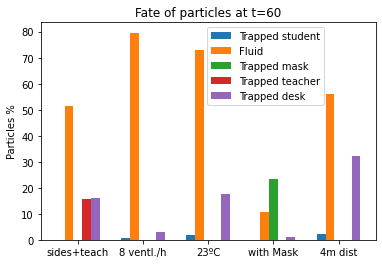

In [11]:
fates = ['Trapped student','Fluid','Trapped mask','Trapped teacher','Trapped desk']
x = 1.5*np.arange(len(newtimesmixdict.keys()))
instant = 60
fix,ax,handles,bars = functions.barplot(newtimesmixdict,'Particles %',instant,fates)
ax.set_xticks(x)
ax.set_xticklabels(newtimesmixdict.keys())
ax.set_ylabel('Particles %')
ax.set_title('Fate of particles at t=' + str(instant))
ax.legend(bbox_to_anchor=(0.56,0.5,0.3,0.5),loc='best')
plt.savefig('mixedbars.pdf')

In [6]:
newtimesmixdict = functions.changekey(newtimesmixdict,8,'8 ventl./h')
newtimesmixdict = functions.changekey(newtimesmixdict,23,'23ºC')
newtimesmixdict = functions.changekey(newtimesmixdict,'wall','with Mask')
newtimesmixdict = functions.changekey(newtimesmixdict,'4student','4m dist')

In [ ]:
newtimesmixdict['wall']

In [23]:
1.5*np.arange(5)

array([0. , 1.5, 3. , 4.5, 6. ])

## Time Evolution plot
## -----------------------------

In [ ]:
fates = ['Fluid'] #,'desk','teacher','student'
functions.plotagainsttime(timesdict,fates,mix=True,savefig=False)

#### Same for mixed

In [ ]:
fates = ['inFluid']
functions.plotagainsttime(newtimesmixdict,fates,mix=True,savefig=True)
#If you pass mix=False there will be one figure for every key (wall,side+teach,etc)
#If you pass mix=True everything will be plotted in one figure
#savefig=False deactivate list


### Other things

In [16]:
fates = timesdict['back+teach'].loc[60,'Fate'].append(timesdict['sides+teach'].loc[60,'Fate'],ignore_index=True).drop_duplicates()

In [112]:
df = timesdict['back+teach'].loc[60]
col = 'Particles %'
instant = 60
matrix = np.empty((len(fates),len(list(timesdict.keys()))))
#print(matrix)
result = [df[col].loc[df.Fate == x].iloc[0] if (df.Fate == x).any() else np.nan for x in fates]

In [ ]:
k = list(resultdict.keys())
    level = [col+' at t='+str(instant)+'s'] * len(k)
    tuples = zip(level,k)
    index = pd.MultiIndex.from_tuples(tuples,names=["Value","Case"])
    array = [np.array(level),np.array(k)]
    
    df = pd.DataFrame(columns=index)

In [9]:
def colacrossparam(resultdict,instant,col='Particles %',to_latex=False):
    fates = pd.Series(dtype='string')
    k = list(resultdict.keys())
    k.insert(0,'Fate')
    level = [col] * len(k)
    tuples = zip(level,k)
    index = pd.MultiIndex.from_tuples(tuples)
    resultdf = pd.DataFrame(columns=index)
    idx = pd.IndexSlice
    #print(resultdf)
    for key,df in resultdict.items():
        fates = fates.append(df.loc[instant,'Fate'],ignore_index=True)
        fates = fates.drop_duplicates()
    fates.reset_index(drop=True,inplace=True)
    #print(fates)
    for key,df in resultdict.items():
        dfinst = df.loc[instant]
        result = [dfinst[col].loc[dfinst.Fate == x].iloc[0] if (dfinst.Fate == x).any() else '-' for x in fates]
        resultdf.loc[:,idx[col,key]] = result
    resultdf.loc[:,idx[col,'Fate']] = fates
    return resultdf

In [10]:
resdf = colacrossparam(timesdict,60)
#resdf.to_latex(buf='prueba',float_format="f{:0.2f}".format,index=False)

In [38]:
type(resdf.columns)

pandas.core.indexes.multi.MultiIndex

In [55]:
type(timesdict['back'].columns)

pandas.core.indexes.base.Index

In [52]:
resdf.columns.levels[1]

Index(['Fate', 'all', 'back', 'back+teach', 'front+teach', 'sides+teach'], dtype='object')

In [ ]:
resdf[~resdf.loc[]]

In [41]:
resdf[~resdf.loc[:,idx[:,'Fate']].squeeze().str.contains('Trapped')]

Particles %                                               \
                     Fate      back back+teach front+teach sides+teach   
0                 inFluid  73.25731  85.986207   39.881114   51.424405   
17  Escaped floor_outlets         -          -           -    0.003571   

               
          all  
0   76.881072  
17   0.000419

In [32]:
idx = pd.IndexSlice

In [111]:
ndf.loc[:,idx['Particles % at t=60s','back+teach']]

Series([], Name: (Particles % at t=60s, back+teach), dtype: object)

In [31]:
'inFluid' in df.Fate[:]

False

In [34]:
(df.Fate == 'inFluid').any()

True

In [113]:
ndf.loc[:,idx['Particles % at t=60s','back+teach']] = result

In [ ]:
column_across_param(timesdict,'Number',60)

# EXAMPLES ON HOW TO ACCESS THE DATA:

In [ ]:
timesdict['sides+teach'].loc[timesdict['sides+teach'].Fate.str.contains(fr"desk",regex=True)]

In [ ]:
massdict['2m'].loc[60]

In [ ]:
totalsdict

In [ ]:
massdict['4m']['Mass %']

In [ ]:
timesdict['2m'].loc[0.6,'Particles %']

### Print several documentations (out of date though)

In [ ]:
print('READ_RESULTS INSTRUCTIONS')
print('----------------------------------------------')
print(read_results.__doc__)
print('-----------------------------------------------')
print('')
print('PERCENTAGE INSTRUCTIONS')
print('----------------------------------------------')
print(percentage.__doc__)
print('-----------------------------------------------')
print('')
print('PLOT AGAINST PARAM INSTRUCTIONS')
print('----------------------------------------------')
print(plotagainstparam.__doc__)
print('MATCHNAMES INSTRUCTIONS')
print('----------------------------------------------')
print(readers.matchnames.__doc__)